In [1]:
import numpy, seaborn

In [2]:
import pandas
pandas.set_option('display.max_colwidth', None)

In [3]:
import scipy, scipy.signal, scipy.optimize
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

### read biomarkers

In [5]:
# read biomarkers
df = pandas.read_excel('/Users/adrian/hub/vigur/002.transcriptomics/arnar_biomarkers/Endothelialbiomarkers.xlsx')
print(df.shape)
biomarkers = list(set(df['Accession']))
print(len(biomarkers))

for element in biomarkers:
    the_list = list(df['Accession'])
    counter = the_list.count(element)
    if counter > 1:
        print(f'Element {element} is twice')
print(len(biomarkers), biomarkers[:5])

(70, 6)
67
Element P29965 is twice
Element O15123 is twice
Element P05305 is twice
67 ['P00734', 'P16109', 'P05362', 'P04085', 'P02741']


In [6]:
# read colored proteins 04 
df = pandas.read_csv('../colored_proteins_04.tsv', sep='\t')
df = df[df["Color_in_plot"].isin(["red", "blue"])]
hits04 = list(set(biomarkers) & set(df['Uniprot_ID']))
df[df['Uniprot_ID'].isin(hits04)]

,Uniprot_ID,Uniprot_gene_ID,Gene_name,ENSEMBL,Description,Color_in_plot,log2FC,Adjusted_P_value
29,P07204,TRBM_HUMAN,THBD,ENSG00000178726,Thrombomodulin,red,0.751316,0.035697
152,Q01650,LAT1_HUMAN,SLC7A5,ENSG00000103257,Large neutral amino acids transporter small subunit 1,red,0.267383,0.035697
163,P16284,PECA1_HUMAN,PECAM1,ENSG00000261371,Platelet endothelial cell adhesion molecule,blue,-0.347914,0.013728
213,P05362,ICAM1_HUMAN,ICAM1,ENSG00000090339,Intercellular adhesion molecule 1,blue,-0.704531,0.019742


In [7]:
# read colored proteins 24 
df = pandas.read_csv('../colored_proteins_24.tsv', sep='\t')
df = df[df["Color_in_plot"].isin(["red", "blue"])]
hits24 = list(set(biomarkers) & set(df['Uniprot_ID']))
df[df['Uniprot_ID'].isin(hits24)]
# PRMT1 is missing, need to add manually

,Uniprot_ID,Uniprot_gene_ID,Gene_name,ENSEMBL,Description,Color_in_plot,log2FC,Adjusted_P_value
374,P19320,VCAM1_HUMAN,VCAM1,ENSG00000162692,Vascular cell adhesion protein 1,blue,-0.984634,0.005809
496,P10145,IL8_HUMAN,CXCL8,ENSG00000169429,Interleukin-8,red,2.161557,0.000382
1093,P02768,ALBU_HUMAN,ALB,ENSG00000163631,Albumin,red,0.357888,0.022243
1521,Q03135,CAV1_HUMAN,CAV1,ENSG00000105974,Caveolin-1,blue,-0.215377,0.010550
1692,O95865,DDAH2_HUMAN,DDAH2,"ENSG00000225635,ENSG00000226634,ENSG00000228128,ENSG00000233076,ENSG00000206395,ENSG00000213722,ENSG00000227317","N(G),N(G)-dimethylarginine dimethylaminohydrolase 2",blue,-0.526253,0.001698


In [8]:
hits = hits04 + hits24
print(len(hits))
print(hits)

9
['Q01650', 'P05362', 'P16284', 'P07204', 'O95865', 'P02768', 'P10145', 'Q03135', 'P19320']


### read proteomics quantification

In [9]:
input_file = '../230117_Arnar.lfq.proteins_From_Gudrun.xlsx'
df = pandas.read_excel(input_file)
df.head()

,Protein Group,Top,Accession,Significance,Coverage (%),#Peptides,#Unique,PTM,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,...,TNF_4H Area,ADRNOR_24H Area,ADR_24H Area,CTRL_24H Area,NOR_24H Area,TNF_24H Area,POOL Area,Group Profile (Ratio),Avg. Mass,Description
0,1659,True,Q01105|SET_HUMAN,61.25,38.28,11,11,Deamidation (NQ),66207.93000,64782.70300,...,81107.9400,98496.01600,87415.87500,103506.5900,75880.66400,121937.48400,104535.27000,1.00:0.92:0.82:1.05:0.94:1.14:1.02:1.20:0.88:1.42:1.21,33489,Protein SET OS=Homo sapiens OX=9606 GN=SET PE=1 SV=3
1,1106,True,P30520|PURA2_HUMAN,45.54,36.18,14,14,Carbamidomethylation; Deamidation (NQ); Oxidation (M),37504.72700,38062.02700,...,72672.8600,60703.20300,53407.13000,77803.8050,45081.79000,64530.84000,61178.14000,1.00:0.99:1.05:0.96:1.41:1.18:1.04:1.51:0.87:1.25:1.19,50097,Adenylosuccinate synthetase isozyme 2 OS=Homo sapiens OX=9606 GN=ADSS2 PE=1 SV=3
2,5753,True,H3BSJ5|H3BSJ5_HUMAN,9.74,13.78,2,2,NaN,710.18670,1787.54140,...,745.0441,970.74500,1280.93070,1131.4752,1574.30470,1760.64750,1590.41820,1.00:1.01:0.82:1.45:0.70:0.91:1.20:1.06:1.48:1.66:1.50,31232,Ubiquinone biosynthesis protein OS=Homo sapiens OX=9606 GN=COQ9 PE=1 SV=1
3,189,True,Q92900|RENT1_HUMAN,37.55,49.07,40,40,Carbamidomethylation; Deamidation (NQ); Oxidation (M),50964.09400,57867.21000,...,48297.3050,32894.06600,22484.96300,17478.6330,49582.24600,17853.52300,49794.11300,1.00:1.25:1.19:1.66:1.18:0.80:0.55:0.43:1.21:0.43:1.21,124345,Regulator of nonsense transcripts 1 OS=Homo sapiens OX=9606 GN=UPF1 PE=1 SV=2
4,6355,True,B7ZBQ3|B7ZBQ3_HUMAN,78.08,9.66,1,1,Carbamidomethylation,328.46777,359.28754,...,558.0640,735.69476,709.92926,1059.3608,401.92883,776.32916,701.92194,1.00:0.89:0.54:0.73:0.96:1.26:1.22:1.82:0.69:1.33:1.20,15923,Mediator of RNA polymerase II transcription subunit 20 OS=Homo sapiens OX=9606 GN=MED20 PE=1 SV=1


### subset hits

In [10]:
# Build a regex pattern like "Q01105|Q9H2X3|Q99873"
pattern = "|".join(hits)
print('biomarkers lenght', len(hits))

# Subset
df = df[df["Accession"].str.contains(pattern, na=False)]
print(df.shape[0])
df

biomarkers lenght 9
9


,Protein Group,Top,Accession,Significance,Coverage (%),#Peptides,#Unique,PTM,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,...,TNF_4H Area,ADRNOR_24H Area,ADR_24H Area,CTRL_24H Area,NOR_24H Area,TNF_24H Area,POOL Area,Group Profile (Ratio),Avg. Mass,Description
776,3132,True,P07204|TRBM_HUMAN,96.95,12.00,5,5,Carbamidomethylation; Deamidation (NQ),12032.99700,11810.28900,...,6246.0150,7297.28800,8401.0850,6493.61300,8187.3765,5585.5273,7114.6816,1.00:0.92:0.66:0.95:0.56:0.66:0.76:0.59:0.74:0.50:0.64,60329,Thrombomodulin OS=Homo sapiens OX=9606 GN=THBD PE=1 SV=2
1234,4059,True,P19320|VCAM1_HUMAN,200.00,12.04,6,6,Carbamidomethylation,282.27454,344.81348,...,1245.1947,761.60046,769.0231,1443.46400,482.5898,7883.5293,1766.4935,1.00:0.84:0.87:0.99:2.27:1.39:1.40:2.63:0.88:14.39:3.22,81276,Vascular cell adhesion protein 1 OS=Homo sapiens OX=9606 GN=VCAM1 PE=1 SV=1
1662,7015,True,P10145|IL8_HUMAN,108.63,16.16,1,1,Carbamidomethylation,242.35114,298.73737,...,5851.8823,1576.47120,1429.5962,345.53012,1251.8600,2990.9954,1660.8219,1.00:0.83:0.34:1.01:4.66:1.26:1.14:0.28:1.00:2.38:1.32,11098,Interleukin-8 OS=Homo sapiens OX=9606 GN=CXCL8 PE=1 SV=1
4164,1852,True,P02768|ALBU_HUMAN,200.00,13.30,8,8,Carbamidomethylation; Deamidation (NQ),126009.50000,127893.85000,...,134980.7800,506742.90000,511455.8000,405420.50000,389652.7000,373922.2500,198132.9400,1.00:0.89:0.81:1.04:1.09:4.09:4.13:3.27:3.15:3.02:1.60,69367,Albumin OS=Homo sapiens OX=9606 GN=ALB PE=1 SV=2
4486,6082,True,Q01650|LAT1_HUMAN,27.40,3.55,1,1,NaN,1671.58520,1715.52430,...,1635.5876,1567.17930,1187.9305,1471.16480,1308.6569,1568.0197,1778.3196,1.00:0.96:0.81:1.02:0.90:0.86:0.65:0.81:0.72:0.86:0.97,55010,Large neutral amino acids transporter small subunit 1 OS=Homo sapiens OX=9606 GN=SLC7A5 PE=1 SV=2
5017,163,True,P16284|PECA1_HUMAN,53.86,55.96,35,35,Carbamidomethylation; Deamidation (NQ); Oxidation (M),154376.40000,151277.94000,...,180103.0200,246680.28000,185985.0500,225655.00000,188283.0200,233533.2000,183392.8100,1.00:1.03:1.30:1.10:1.16:1.59:1.20:1.46:1.22:1.51:1.18,82522,Platelet endothelial cell adhesion molecule OS=Homo sapiens OX=9606 GN=PECAM1 PE=1 SV=2
6297,1959,True,Q03135|CAV1_HUMAN,38.35,19.10,11,4,Deamidation (NQ); Oxidation (M),171898.31000,174551.19000,...,218920.7700,203526.62000,237747.9000,237073.52000,179336.3400,197617.7500,216652.5600,1.00:0.91:0.78:0.96:1.11:1.03:1.21:1.21:0.91:1.00:1.10,20472,Caveolin-1 OS=Homo sapiens OX=9606 GN=CAV1 PE=1 SV=4
7204,2283,True,O95865|DDAH2_HUMAN,73.04,59.65,14,13,Acetylation (K); Carbamidomethylation; Deamidation (NQ),30070.07800,40105.54000,...,61488.2340,48566.41400,41010.7100,70625.02000,39980.4530,50375.0470,51439.3440,1.00:1.15:1.29:1.08:1.61:1.27:1.07:1.85:1.05:1.32:1.35,29644,"N(G),N(G)-dimethylarginine dimethylaminohydrolase 2 OS=Homo sapiens OX=9606 GN=DDAH2 PE=1 SV=1"
7468,980,True,P05362|ICAM1_HUMAN,200.00,40.60,18,18,Carbamidomethylation; Deamidation (NQ); Oxidation (M),13747.57000,13798.46000,...,44409.4960,16469.67800,23998.8480,16766.32800,17305.7950,221348.5600,45168.2230,1.00:1.12:1.48:1.30:3.02:1.12:1.63:1.14:1.18:15.07:3.07,57825,Intercellular adhesion molecule 1 OS=Homo sapiens OX=9606 GN=ICAM1 PE=1 SV=2


In [11]:
gene_names = []
for element in df['Description']:
    gene_name = element.split('GN=')[1].split(' ')[0]
    gene_names.append(gene_name)

print(len(gene_names))
print(len(set(gene_names)))

df['gene_names'] = gene_names
df = df.set_index("gene_names")

9
9


In [12]:
selected_columns = {}
working_columns = []

selected_columns['CTRL_4H_'] = []
selected_columns['CTRL_24H_'] = []
selected_columns['ADRNOR_4H_'] = []
selected_columns['ADRNOR_24H_'] = []

for element in df.columns:
    for key in selected_columns.keys():
        if key in element:
            selected_columns[key].append(element)
            working_columns.append(element)

for key in selected_columns.keys():
    print(key)
    print(selected_columns[key])
    print()
    
print(working_columns)

CTRL_4H_
['CTRL_4H_1_1_2752 Area', 'CTRL_4H_1_2_2753 Area', 'CTRL_4H_2_1_2755 Area', 'CTRL_4H_2_2_2756 Area', 'CTRL_4H_3_1_2758 Area', 'CTRL_4H_3_2_2759 Area']

CTRL_24H_
['CTRL_24H_1_1_2840 Area', 'CTRL_24H_1_2_2841 Area', 'CTRL_24H_2_1_2843 Area', 'CTRL_24H_2_2_2844 Area', 'CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']

ADRNOR_4H_
['ADRNOR_4H_1_1_2792 Area', 'ADRNOR_4H_1_2_2793 Area', 'ADRNOR_4H_2_1_2795 Area', 'ADRNOR_4H_2_2_2796 Area', 'ADRNOR_4H_3_1_2798 Area', 'ADRNOR_4H_3_2_2799 Area']

ADRNOR_24H_
['ADRNOR_24H_1_1_2931 Area', 'ADRNOR_24H_1_2_2932 Area', 'ADRNOR_24H_2_1_2934 Area', 'ADRNOR_24H_2_2_2935 Area', 'ADRNOR_24H_3_1_2937 Area', 'ADRNOR_24H_3_2_2938 Area']

['ADRNOR_4H_1_1_2792 Area', 'ADRNOR_4H_1_2_2793 Area', 'ADRNOR_4H_2_1_2795 Area', 'ADRNOR_4H_2_2_2796 Area', 'ADRNOR_4H_3_1_2798 Area', 'ADRNOR_4H_3_2_2799 Area', 'CTRL_4H_1_1_2752 Area', 'CTRL_4H_1_2_2753 Area', 'CTRL_4H_2_1_2755 Area', 'CTRL_4H_2_2_2756 Area', 'CTRL_4H_3_1_2758 Area', 'CTRL_4H_3_2_2759 Area', '

In [13]:
df = df[working_columns]
df

,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,ADRNOR_4H_2_1_2795 Area,ADRNOR_4H_2_2_2796 Area,ADRNOR_4H_3_1_2798 Area,ADRNOR_4H_3_2_2799 Area,CTRL_4H_1_1_2752 Area,CTRL_4H_1_2_2753 Area,CTRL_4H_2_1_2755 Area,CTRL_4H_2_2_2756 Area,...,ADRNOR_24H_2_1_2934 Area,ADRNOR_24H_2_2_2935 Area,ADRNOR_24H_3_1_2937 Area,ADRNOR_24H_3_2_2938 Area,CTRL_24H_1_1_2840 Area,CTRL_24H_1_2_2841 Area,CTRL_24H_2_1_2843 Area,CTRL_24H_2_2_2844 Area,CTRL_24H_3_1_2846 Area,CTRL_24H_3_2_2847 Area
gene_names,,,,,,,,,,,,,,,,,,,,,
THBD,12032.99700,11810.28900,12469.23600,11598.71300,9444.90400,8033.52050,6701.70750,7142.25730,8576.34400,6767.79200,...,8522.33200,6692.56350,7822.5156,7136.5557,5327.0864,5336.0960,6215.7110,6180.95850,7933.60000,7968.22500
VCAM1,282.27454,344.81348,529.32275,304.42596,840.91626,863.30084,471.40884,560.57874,275.58400,343.79446,...,662.52124,619.35706,796.1818,538.7106,1614.9735,1625.1704,1289.3525,961.76587,1502.26450,1376.79880
CXCL8,242.35114,298.73737,1703.93520,1688.94010,1888.07290,1706.69210,572.31770,221.94403,172.76007,168.13309,...,1606.65750,1557.83330,1763.5095,1742.0830,336.4618,235.4241,370.0064,109.11915,378.22437,421.48196
ALB,126009.50000,127893.85000,124104.34000,124583.18000,121411.58000,119187.37000,120482.06000,112377.58000,85707.86000,82800.20000,...,440051.66000,471707.72000,500678.4400,498945.2000,363705.2800,370031.7800,423845.2200,494015.56000,371573.00000,409352.12000
SLC7A5,1671.58520,1715.52430,1884.49330,1875.03090,1953.58480,1850.73340,1533.06450,1562.12650,1568.10840,1582.92110,...,1605.38090,1526.42490,1502.5873,1510.0645,1429.8014,1384.7084,1491.3246,1507.69760,1490.43590,1523.02050
PECAM1,154376.40000,151277.94000,169707.31000,158579.81000,152464.92000,142425.10000,183502.90000,185958.40000,214571.25000,229263.38000,...,241125.10000,256876.36000,232792.6200,230328.1100,206487.7500,217585.2500,212910.2800,233691.48000,239097.45000,244157.75000
CAV1,171898.31000,174551.19000,195684.77000,180843.67000,229020.88000,228056.56000,131412.50000,132075.58000,133832.42000,133284.03000,...,200779.69000,195702.22000,208025.0300,214634.2300,237206.2300,231359.7700,256107.0300,262125.38000,211402.03000,224240.61000
DDAH2,30070.07800,40105.54000,29264.99600,38981.76000,51771.44500,38723.45300,51387.10500,59904.58000,42423.19500,39829.60000,...,43153.52300,44638.27700,47573.5620,48148.1170,68221.2400,69641.3050,76585.2800,83839.83000,65215.93800,60246.52300
ICAM1,13747.57000,13798.46000,16975.75400,13769.77900,14930.55300,14918.84000,23158.25400,24029.96900,17739.48600,17727.35200,...,19276.80900,19538.90600,12566.6910,16059.7080,10587.1330,19242.0660,16748.5660,18532.06800,17091.72300,18396.41400


In [14]:
# lets get the medians of the injections. well, there are two injections, median, mean, potato, potato...
next_columns = []
for i in range(0, len(working_columns), 2):
    col_a = working_columns[i]
    col_b = working_columns[i + 1]
    new_col_name = 'median_' + '_'.join(col_a.split('_')[:3]) 
    df[new_col_name] = df[[col_a, col_b]].median(axis=1)
    print(col_a, col_b, new_col_name)
    next_columns.append(new_col_name)

df = df[next_columns]
df

ADRNOR_4H_1_1_2792 Area ADRNOR_4H_1_2_2793 Area median_ADRNOR_4H_1
ADRNOR_4H_2_1_2795 Area ADRNOR_4H_2_2_2796 Area median_ADRNOR_4H_2
ADRNOR_4H_3_1_2798 Area ADRNOR_4H_3_2_2799 Area median_ADRNOR_4H_3
CTRL_4H_1_1_2752 Area CTRL_4H_1_2_2753 Area median_CTRL_4H_1
CTRL_4H_2_1_2755 Area CTRL_4H_2_2_2756 Area median_CTRL_4H_2
CTRL_4H_3_1_2758 Area CTRL_4H_3_2_2759 Area median_CTRL_4H_3
ADRNOR_24H_1_1_2931 Area ADRNOR_24H_1_2_2932 Area median_ADRNOR_24H_1
ADRNOR_24H_2_1_2934 Area ADRNOR_24H_2_2_2935 Area median_ADRNOR_24H_2
ADRNOR_24H_3_1_2937 Area ADRNOR_24H_3_2_2938 Area median_ADRNOR_24H_3
CTRL_24H_1_1_2840 Area CTRL_24H_1_2_2841 Area median_CTRL_24H_1
CTRL_24H_2_1_2843 Area CTRL_24H_2_2_2844 Area median_CTRL_24H_2
CTRL_24H_3_1_2846 Area CTRL_24H_3_2_2847 Area median_CTRL_24H_3


,median_ADRNOR_4H_1,median_ADRNOR_4H_2,median_ADRNOR_4H_3,median_CTRL_4H_1,median_CTRL_4H_2,median_CTRL_4H_3,median_ADRNOR_24H_1,median_ADRNOR_24H_2,median_ADRNOR_24H_3,median_CTRL_24H_1,median_CTRL_24H_2,median_CTRL_24H_3
gene_names,,,,,,,,,,,,
THBD,11921.643000,12033.974500,8739.21225,6921.982400,7672.06800,7447.81775,6804.882050,7607.44775,7479.53565,5331.59120,6198.334750,7950.912500
VCAM1,313.544010,416.874355,852.10855,515.993790,309.68923,468.49980,976.416075,640.93915,667.44620,1620.07195,1125.559185,1439.531650
CXCL8,270.544255,1696.437650,1797.38250,397.130865,170.44658,720.75660,1394.371750,1582.24540,1752.79625,285.94295,239.562775,399.853165
ALB,126951.675000,124343.760000,120299.47500,116429.820000,84254.03000,101384.14800,564537.325000,455879.69000,499811.82000,366868.53000,458930.390000,390462.560000
SLC7A5,1693.554750,1879.762100,1902.15910,1547.595500,1575.51475,1301.18025,1629.309100,1565.90290,1506.32590,1407.25490,1499.511100,1506.728200
PECAM1,152827.170000,164143.560000,147445.01000,184730.650000,221917.31500,195365.46000,259479.770000,249000.73000,231560.36500,212036.50000,223300.880000,241627.600000
CAV1,173224.750000,188264.220000,228538.72000,131744.040000,133558.22500,196552.52000,201009.305000,198240.95500,211329.63000,234283.00000,259116.205000,217821.320000
DDAH2,35087.809000,34123.378000,45247.44900,55645.842500,41126.39750,51369.49750,53942.496000,43895.90000,47860.83950,68931.27250,80212.555000,62731.230500
ICAM1,13773.015000,15372.766500,14924.69650,23594.111500,17733.41900,23932.20400,15687.973000,19407.85750,14313.19950,14914.59950,17640.317000,17744.068500


In [15]:
zscore_df = df.apply(scipy.stats.zscore, axis=1)
zscore_df.head()

,median_ADRNOR_4H_1,median_ADRNOR_4H_2,median_ADRNOR_4H_3,median_CTRL_4H_1,median_CTRL_4H_2,median_CTRL_4H_3,median_ADRNOR_24H_1,median_ADRNOR_24H_2,median_ADRNOR_24H_3,median_CTRL_24H_1,median_CTRL_24H_2,median_CTRL_24H_3
gene_names,,,,,,,,,,,,
THBD,1.998461,2.055838,0.372922,-0.555292,-0.172160,-0.286703,-0.615105,-0.205167,-0.270502,-1.367641,-0.924921,-0.029730
VCAM1,-1.119542,-0.870947,0.176153,-0.632482,-1.128816,-0.746745,0.475215,-0.331885,-0.268114,2.023741,0.834028,1.589392
CXCL8,-0.948807,1.227162,1.381208,-0.755631,-1.101560,-0.261766,0.766198,1.052900,1.313168,-0.925308,-0.996086,-0.751477
ALB,-0.881344,-0.895963,-0.918633,-0.940325,-1.120687,-1.024663,1.571553,0.962470,1.208733,0.463516,0.979571,0.595773
SLC7A5,0.652452,1.767171,1.901249,-0.221325,-0.054188,-1.696476,0.267849,-0.111729,-0.468383,-1.061466,-0.509179,-0.465975


In [16]:
#new_order = ["median_CTRL_4H", "median_ADRNOR_4H", "median_CTRL_24H", "median_ADRNOR_24H"]
#zscore_df = zscore_df[new_order]

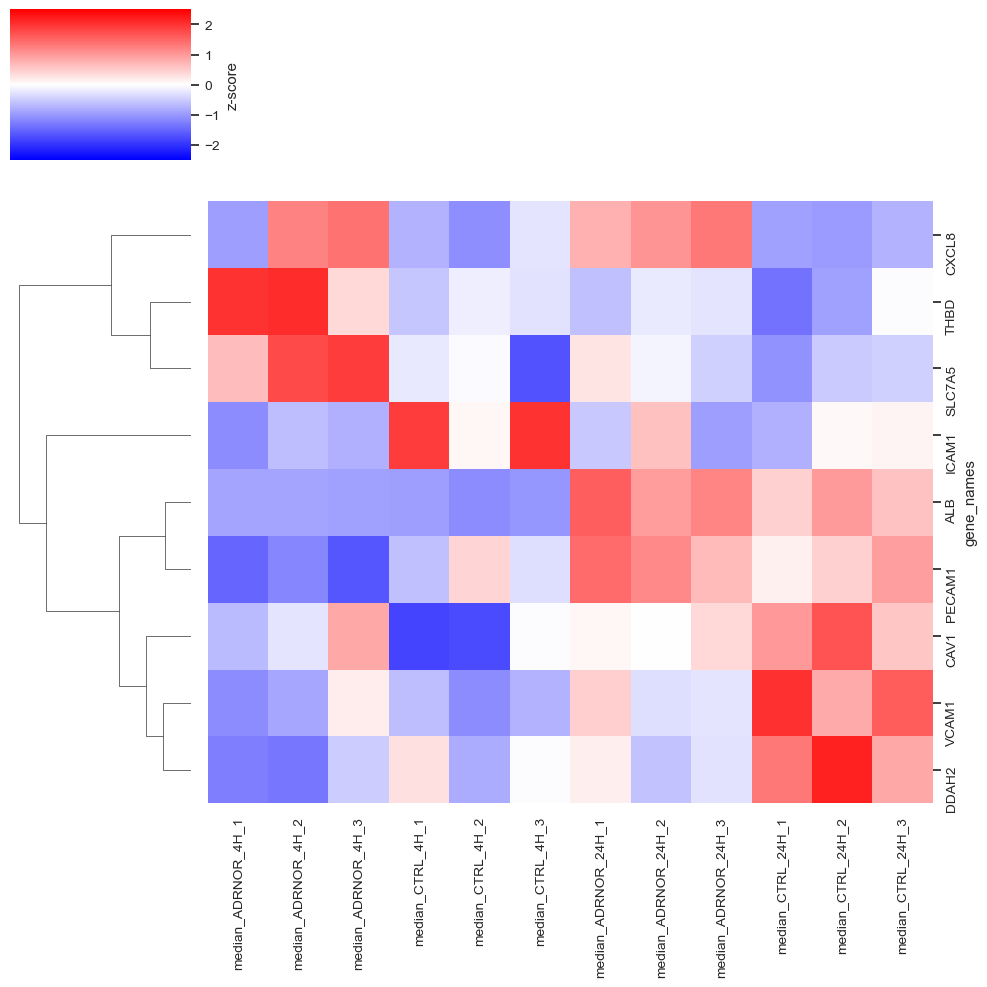

In [17]:
linkage_method = 'average'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)

seaborn.clustermap(zscore_df, 
                   cmap='bwr', 
                   col_cluster=False, 
                   row_cluster=True,
                   vmin=-2.5, vmax=2.5, 
                   method=linkage_method, 
                   metric=distance_metric, 
                   yticklabels=1, 
                   cbar_kws={'label':'z-score'})

matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('figure.svg')